In [125]:
%%HTML
<style>
    /* style for presentation only */
    .reveal .rendered_html table { font-size: 24px }
</style> 

# HODL-AI: Live Coding RNN on the Blockchain

_Machine Learning Mega Bash_ 

2018/04/23 - Blackbox, Belfast

_This presentation and associated files are available at [present.bolster.online](http://present.bolster.online)_


## Who are ya?
* Andrew Bolster (@bolster)
* MEng Elec. & SW Eng. QUB
* PhD Autonomous Systems UoL
* Data Scientist at Alert Logic
* Director at Farset Labs

## Whats the craic?
* Garth got me in a moment of weakness and I spouted a load of BS clickbait buzzwords at him. Seemed like a good idea at the time. 
* AI / ML is a load of FUD, but sometimes it's worth going through with a bad idea to get an understanding of why the decisions we make in ML pipelines massively change the outcomes.

## Caveats

* Bitcoin Valuations are BS and are the definition of an irrational market; the idea that a simple one notebook ML model would in any way accurately predict future variations is similarly BS.
* The purpose of this talk is to explore timeseries analysis using a Python/ScikitLearn/Keras stack, not to make you (or me) rich.
* I guarantee I will mess up at some point(s).
* **Spoilers**: This method does not work because of the simplicity of the networks used, instead I want to show the 'beginning' of a model search, not the answers.

## Background Info

### What is Blockchain?
* A consensus based distributed ledger with (mostly) guaranteed proof of work.
* A fantastic solution in search of a problem.

### What are Neural Networks
* Simple cells connected together in particular ways to enable learning of abstract input/output mappings
![](nn.png)

### What are Recurrent Neural Networks
* Separated dimensionality of input/output (usually time)
* Changes process from 'state analysis' to 'sequence analysis'
* Can be 1-1/1-*/*-1/*-*
![](rnn.png)

### What are Long Short-Term Memory cells?
* They so fancy!
* Input-Output-Forget
* Corrects for vanishing gradient problems
![](lstm.jpg)

### What is Keras?

> Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

## Requirements

In [126]:
requirements="autopep8 gdax pandas numpy cufflinks sklearn keras keras-tqdm"
# autopep8 is to make the jupyter notebook pretty
# gdax does bitcoin
# pandas numpy sklearn keras for data and machine learning
# See https://andrewbolster.info/2017/10/my-basic-python-data-science-setup
import pip
if 0== pip.main(f'install -q {requirements}'.split()):
    print("Requirements satisfied")

Requirements satisfied


## Zee Plan

### Part The First - It's The Data, Stupid
* Data Extraction (Collection/Acquisition/Ingestion)
* Data Transformation (Cleaning/Sanitising)

### Part The Second - Prepare to Fail, Fail to Prepare
* Problem Transformation to a Supervised Learning Problem
* Scaling and Activation
* Basic Single Layer Univariate LSTM
* Performance Review

## Notes
* https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

# It's the data, stupid
Where does it come from? 
What format is it in?


## Chasing the blockchain
* [`gdax-python`](https://github.com/danpaquin/gdax-python) is awesome
* [Great Hackernoon Writeup](https://hackernoon.com/beginners-guide-to-gdax-an-exchange-of-coinbase-to-trade-btc-eth-and-ltc-e418fd1acd1b)
* Allows programmatic trading.
* But we're not doing that today; KISS

In [129]:
# Get products list from gdax public client
import gdax
public_client = gdax.PublicClient()
public_client.get_products()

[{'id': 'BCH-BTC',
  'base_currency': 'BCH',
  'quote_currency': 'BTC',
  'base_min_size': '0.01',
  'base_max_size': '200',
  'quote_increment': '0.00001',
  'display_name': 'BCH/BTC',
  'status': 'online',
  'margin_enabled': False,
  'status_message': None,
  'min_market_funds': '0.001',
  'max_market_funds': '30',
  'post_only': False,
  'limit_only': False,
  'cancel_only': False},
 {'id': 'BCH-USD',
  'base_currency': 'BCH',
  'quote_currency': 'USD',
  'base_min_size': '0.01',
  'base_max_size': '350',
  'quote_increment': '0.01',
  'display_name': 'BCH/USD',
  'status': 'online',
  'margin_enabled': False,
  'status_message': None,
  'min_market_funds': '10',
  'max_market_funds': '1000000',
  'post_only': False,
  'limit_only': False,
  'cancel_only': False},
 {'id': 'BTC-EUR',
  'base_currency': 'BTC',
  'quote_currency': 'EUR',
  'base_min_size': '0.001',
  'base_max_size': '50',
  'quote_increment': '0.01',
  'display_name': 'BTC/EUR',
  'status': 'online',
  'margin_enable

In [76]:
import gdax
public_client = gdax.PublicClient()
public_client.get_products()

[{'id': 'BCH-BTC',
  'base_currency': 'BCH',
  'quote_currency': 'BTC',
  'base_min_size': '0.01',
  'base_max_size': '200',
  'quote_increment': '0.00001',
  'display_name': 'BCH/BTC',
  'status': 'online',
  'margin_enabled': False,
  'status_message': None,
  'min_market_funds': '0.001',
  'max_market_funds': '30',
  'post_only': False,
  'limit_only': False,
  'cancel_only': False},
 {'id': 'BCH-USD',
  'base_currency': 'BCH',
  'quote_currency': 'USD',
  'base_min_size': '0.01',
  'base_max_size': '350',
  'quote_increment': '0.01',
  'display_name': 'BCH/USD',
  'status': 'online',
  'margin_enabled': False,
  'status_message': None,
  'min_market_funds': '10',
  'max_market_funds': '1000000',
  'post_only': False,
  'limit_only': False,
  'cancel_only': False},
 {'id': 'BTC-EUR',
  'base_currency': 'BTC',
  'quote_currency': 'EUR',
  'base_min_size': '0.001',
  'base_max_size': '50',
  'quote_increment': '0.01',
  'display_name': 'BTC/EUR',
  'status': 'online',
  'margin_enable

In [130]:
# use pandas to format then products list to be a bit prettier
import pandas as pd
pd.DataFrame(public_client.get_products())

base_currency base_max_size base_min_size  cancel_only display_name  \
0            BCH           200          0.01        False      BCH/BTC   
1            BCH           350          0.01        False      BCH/USD   
2            BTC            50         0.001        False      BTC/EUR   
3            BTC            20         0.001        False      BTC/GBP   
4            BTC            70         0.001        False      BTC/USD   
5            ETH           600          0.01        False      ETH/BTC   
6            ETH           400          0.01        False      ETH/EUR   
7            ETH           700          0.01        False      ETH/USD   
8            LTC          2000           0.1        False      LTC/BTC   
9            LTC          1000           0.1        False      LTC/EUR   
10           LTC          4000           0.1        False      LTC/USD   
11           BCH           120          0.01        False      BCH/EUR   

         id  limit_only  margin_enabled max_market_funds min_market_funds  \
0   BCH-BTC       False           False               30            0.001   
1   BCH-USD       False           False          1000000               10   
2   BTC-EUR       False           False           600000               10   
3   BTC-GBP       False           False           200000               10   
4   BTC-USD       False           False          1000000               10   
5   ETH-BTC       False           False               50            0.001   
6   ETH-EUR       False           False           400000               10   
7   ETH-USD       False           False          1000000               10   
8   LTC-BTC       False           False               30            0.001   
9   LTC-EUR       False           False           200000               10   
10  LTC-USD       False           False          1000000               10   
11  BCH-EUR       False           False           200000               10   

    post_only quote_currency quote_increment  status status_message  
0       False            BTC         0.00001  online           None  
1       False            USD            0.01  online           None  
2       False            EUR            0.01  online           None  
3       False            GBP            0.01  online           None  
4       False            USD            0.01  online           None  
5       False            BTC         0.00001  online           None  
6       False            EUR            0.01  online           None  
7       False            USD            0.01  online           None  
8       False            BTC         0.00001  online           None  
9       False            EUR            0.01  online           None  
10      False            USD            0.01  online           None  
11      False            EUR            0.01  online           None

In [78]:
import pandas as pd
pd.DataFrame(public_client.get_products())

base_currency base_max_size base_min_size  cancel_only display_name  \
0            BCH           200          0.01        False      BCH/BTC   
1            BCH           350          0.01        False      BCH/USD   
2            BTC            50         0.001        False      BTC/EUR   
3            BTC            20         0.001        False      BTC/GBP   
4            BTC            70         0.001        False      BTC/USD   
5            ETH           600          0.01        False      ETH/BTC   
6            ETH           400          0.01        False      ETH/EUR   
7            ETH           700          0.01        False      ETH/USD   
8            LTC          2000           0.1        False      LTC/BTC   
9            LTC          1000           0.1        False      LTC/EUR   
10           LTC          4000           0.1        False      LTC/USD   
11           BCH           120          0.01        False      BCH/EUR   

         id  limit_only  margin_enabled max_market_funds min_market_funds  \
0   BCH-BTC       False           False               30            0.001   
1   BCH-USD       False           False          1000000               10   
2   BTC-EUR       False           False           600000               10   
3   BTC-GBP       False           False           200000               10   
4   BTC-USD       False           False          1000000               10   
5   ETH-BTC       False           False               50            0.001   
6   ETH-EUR       False           False           400000               10   
7   ETH-USD       False           False          1000000               10   
8   LTC-BTC       False           False               30            0.001   
9   LTC-EUR       False           False           200000               10   
10  LTC-USD       False           False          1000000               10   
11  BCH-EUR       False           False           200000               10   

    post_only quote_currency quote_increment  status status_message  
0       False            BTC         0.00001  online           None  
1       False            USD            0.01  online           None  
2       False            EUR            0.01  online           None  
3       False            GBP            0.01  online           None  
4       False            USD            0.01  online           None  
5       False            BTC         0.00001  online           None  
6       False            EUR            0.01  online           None  
7       False            USD            0.01  online           None  
8       False            BTC         0.00001  online           None  
9       False            EUR            0.01  online           None  
10      False            USD            0.01  online           None  
11      False            EUR            0.01  online           None

In [134]:
# get historic rates for 'BTC-USD', and give it to pandas
# (remember column order; TLHOCV)
pd.DataFrame(
    public_client.get_product_historic_rates('BTC-USD'), 
    columns=['time','low','high','open','close','volume'])

time      low     high     open    close     volume
0    1524509700  8907.00  8907.00  8907.00  8907.00   0.286700
1    1524509640  8906.99  8907.00  8906.99  8907.00   0.509510
2    1524509580  8906.99  8907.00  8907.00  8907.00   0.192700
3    1524509520  8906.99  8907.00  8906.99  8906.99   1.943114
4    1524509460  8906.99  8907.00  8906.99  8907.00   3.656145
5    1524509400  8906.99  8907.00  8906.99  8907.00   2.251107
6    1524509340  8905.99  8907.00  8905.99  8906.99   6.483964
7    1524509280  8904.99  8905.00  8904.99  8905.00   6.437750
8    1524509220  8904.00  8905.00  8904.00  8904.99  12.768002
9    1524509160  8901.00  8904.00  8901.00  8904.00   4.724637
10   1524509100  8901.00  8901.01  8901.00  8901.01   4.016008
11   1524509040  8901.00  8901.01  8901.01  8901.01   1.759232
12   1524508980  8901.00  8901.01  8901.00  8901.00   1.378653
13   1524508920  8901.00  8901.01  8901.00  8901.00   1.026541
14   1524508860  8901.00  8901.01  8901.01  8901.00   5.311800
15   1524508800  8901.00  8901.01  8901.01  8901.00   1.550333
16   1524508740  8901.00  8901.01  8901.00  8901.00   2.352722
17   1524508680  8901.00  8909.00  8908.99  8901.00  77.299596
18   1524508620  8908.99  8909.00  8909.00  8908.99   4.704938
19   1524508560  8908.99  8909.00  8908.99  8908.99   3.016413
20   1524508500  8908.99  8909.00  8908.99  8909.00   0.406579
21   1524508440  8908.99  8909.00  8909.00  8908.99   3.709299
22   1524508380  8908.99  8909.00  8908.99  8908.99   2.497345
23   1524508320  8906.47  8909.00  8906.47  8908.99   3.575502
24   1524508260  8899.98  8906.45  8899.99  8906.45  15.627276
25   1524508200  8899.98  8899.99  8899.98  8899.99  14.527836
26   1524508140  8899.98  8899.99  8899.98  8899.99   7.258738
27   1524508080  8899.98  8899.99  8899.98  8899.98   2.922756
28   1524508020  8888.99  8899.99  8889.00  8899.98  35.912812
29   1524507960  8888.99  8889.00  8889.00  8888.99   2.412108
..          ...      ...      ...      ...      ...        ...
270  1524493500  8905.00  8905.01  8905.00  8905.01   4.561419
271  1524493440  8905.00  8908.15  8905.71  8905.00   5.256459
272  1524493380  8905.00  8905.66  8905.01  8905.66   1.816654
273  1524493320  8905.00  8911.69  8911.69  8905.00  11.729551
274  1524493260  8895.46  8911.70  8895.47  8911.69  18.928392
275  1524493200  8895.46  8895.47  8895.47  8895.46   2.191248
276  1524493140  8895.46  8895.47  8895.46  8895.46   1.846582
277  1524493080  8895.46  8895.47  8895.46  8895.47  15.159551
278  1524493020  8895.00  8903.00  8903.00  8895.34  19.115037
279  1524492960  8903.15  8915.00  8909.00  8903.15   4.357070
280  1524492900  8900.00  8908.00  8904.02  8908.00  29.639656
281  1524492840  8904.11  8921.00  8920.99  8904.11  42.594683
282  1524492780  8920.99  8921.00  8920.99  8920.99   1.679960
283  1524492720  8920.99  8921.00  8920.99  8920.99   3.590269
284  1524492660  8920.99  8925.99  8925.99  8921.00  11.038059
285  1524492600  8925.99  8930.01  8930.01  8926.00   3.653250
286  1524492540  8930.00  8930.09  8930.09  8930.01   1.590277
287  1524492480  8930.09  8930.10  8930.09  8930.09   1.763368
288  1524492420  8930.16  8931.40  8931.39  8930.16   4.535851
289  1524492360  8925.99  8931.40  8926.00  8931.40   8.161563
290  1524492300  8917.00  8926.00  8917.00  8925.99   2.849100
291  1524492240  8916.99  8917.00  8917.00  8917.00   5.369532
292  1524492180  8916.99  8917.00  8916.99  8917.00  10.412870
293  1524492120  8916.99  8917.00  8917.00  8917.00   7.625496
294  1524492060  8910.02  8917.01  8917.01  8917.00   7.587861
295  1524492000  8917.00  8920.11  8920.11  8917.00  15.114747
296  1524491940  8920.10  8920.11  8920.10  8920.10   1.588945
297  1524491880  8920.10  8936.20  8936.20  8920.11   6.452501
298  1524491820  8936.20  8936.21  8936.20  8936.21   4.502257
299  1524491760  8936.20  8936.21  8936.20  8936.21   4.393606

[300 rows x 6 columns]

In [80]:
df = pd.DataFrame(
    public_client.get_product_historic_rates(product_id='BTC-USD'),
    columns=['time','low','high','open','close','volume']
)
display(df.head())

time      low     high     open    close     volume
0  1524504120  8893.47  8893.48  8893.48  8893.48   1.544871
1  1524504060  8893.47  8893.48  8893.48  8893.47   4.297853
2  1524504000  8893.47  8893.48  8893.48  8893.48  13.887844
3  1524503940  8893.47  8893.48  8893.47  8893.47   6.147527
4  1524503880  8887.56  8893.48  8887.57  8893.47   6.008097

In [137]:
# convert 'time' to dt 
df = pd.DataFrame(
    public_client.get_product_historic_rates('BTC-USD'), 
    columns=['time','low','high','open','close','volume'])
df['time'] = pd.to_datetime(df['time'], unit='s')
df

time      low     high     open    close     volume
0   2018-04-23 18:56:00  8906.99  8907.00  8906.99  8907.00   0.637195
1   2018-04-23 18:55:00  8906.99  8907.00  8907.00  8906.99   1.507100
2   2018-04-23 18:54:00  8906.99  8907.00  8906.99  8907.00   0.509510
3   2018-04-23 18:53:00  8906.99  8907.00  8907.00  8907.00   0.192700
4   2018-04-23 18:52:00  8906.99  8907.00  8906.99  8906.99   1.943114
5   2018-04-23 18:51:00  8906.99  8907.00  8906.99  8907.00   3.656145
6   2018-04-23 18:50:00  8906.99  8907.00  8906.99  8907.00   2.251107
7   2018-04-23 18:49:00  8905.99  8907.00  8905.99  8906.99   6.483964
8   2018-04-23 18:48:00  8904.99  8905.00  8904.99  8905.00   6.437750
9   2018-04-23 18:47:00  8904.00  8905.00  8904.00  8904.99  12.768002
10  2018-04-23 18:46:00  8901.00  8904.00  8901.00  8904.00   4.724637
11  2018-04-23 18:45:00  8901.00  8901.01  8901.00  8901.01   4.016008
12  2018-04-23 18:44:00  8901.00  8901.01  8901.01  8901.01   1.759232
13  2018-04-23 18:43:00  8901.00  8901.01  8901.00  8901.00   1.378653
14  2018-04-23 18:42:00  8901.00  8901.01  8901.00  8901.00   1.026541
15  2018-04-23 18:41:00  8901.00  8901.01  8901.01  8901.00   5.311800
16  2018-04-23 18:40:00  8901.00  8901.01  8901.01  8901.00   1.550333
17  2018-04-23 18:39:00  8901.00  8901.01  8901.00  8901.00   2.352722
18  2018-04-23 18:38:00  8901.00  8909.00  8908.99  8901.00  77.299596
19  2018-04-23 18:37:00  8908.99  8909.00  8909.00  8908.99  76.701947
20  2018-04-23 18:36:00  8908.99  8909.00  8908.99  8908.99   3.016413
21  2018-04-23 18:35:00  8908.99  8909.00  8908.99  8908.99   0.496679
22  2018-04-23 18:34:00  8908.99  8909.00  8909.00  8908.99   3.709299
23  2018-04-23 18:33:00  8908.99  8909.00  8908.99  8908.99   2.497345
24  2018-04-23 18:32:00  8906.47  8909.00  8906.47  8908.99   4.148702
25  2018-04-23 18:31:00  8899.98  8906.48  8899.99  8906.48  16.156576
26  2018-04-23 18:30:00  8899.98  8899.99  8899.98  8899.99  14.527836
27  2018-04-23 18:29:00  8899.98  8899.99  8899.98  8899.99   7.258738
28  2018-04-23 18:28:00  8899.98  8899.99  8899.98  8899.98   2.922756
29  2018-04-23 18:27:00  8888.99  8899.99  8889.00  8899.99  37.816936
..                  ...      ...      ...      ...      ...        ...
270 2018-04-23 14:26:00  8905.00  8905.01  8905.00  8905.00   8.249743
271 2018-04-23 14:25:00  8905.00  8905.01  8905.00  8905.01   4.561419
272 2018-04-23 14:24:00  8905.00  8908.15  8905.71  8905.00   5.256459
273 2018-04-23 14:23:00  8905.00  8905.66  8905.01  8905.66   1.816654
274 2018-04-23 14:22:00  8905.00  8911.69  8911.69  8905.00  11.729551
275 2018-04-23 14:21:00  8895.46  8911.70  8895.47  8911.69  18.928392
276 2018-04-23 14:20:00  8895.46  8895.47  8895.47  8895.47   2.908838
277 2018-04-23 14:19:00  8895.46  8895.47  8895.46  8895.46   1.846582
278 2018-04-23 14:18:00  8895.46  8895.47  8895.46  8895.47  15.159551
279 2018-04-23 14:17:00  8895.00  8903.00  8903.00  8895.34  19.115037
280 2018-04-23 14:16:00  8903.15  8915.00  8909.00  8903.15   4.357070
281 2018-04-23 14:15:00  8900.00  8908.00  8904.02  8908.00  29.639656
282 2018-04-23 14:14:00  8904.11  8921.00  8920.99  8904.11  42.594683
283 2018-04-23 14:13:00  8920.99  8921.00  8920.99  8920.99   1.679960
284 2018-04-23 14:12:00  8920.99  8921.00  8920.99  8920.99   3.590269
285 2018-04-23 14:11:00  8920.99  8925.99  8925.99  8921.00  11.038059
286 2018-04-23 14:10:00  8925.99  8930.01  8930.01  8926.00   3.653250
287 2018-04-23 14:09:00  8930.00  8930.09  8930.09  8930.01   1.615010
288 2018-04-23 14:08:00  8930.09  8930.10  8930.09  8930.09   1.763368
289 2018-04-23 14:07:00  8930.16  8931.40  8931.39  8930.16   4.535851
290 2018-04-23 14:06:00  8925.99  8931.40  8926.00  8931.40   8.161563
291 2018-04-23 14:05:00  8917.00  8926.00  8917.00  8925.99   2.849100
292 2018-04-23 14:04:00  8916.99  8917.00  8917.00  8917.00   5.369532
293 2018-04-23 14:03:00  8916.99  8917.00  8916.99  8917.00  10.412870
294 2018-04-23 14:02:00  8916.99  8917.00  

In [82]:
pd.to_datetime(df['time'], unit='s').head()

0   2018-04-23 17:22:00
1   2018-04-23 17:21:00
2   2018-04-23 17:20:00
3   2018-04-23 17:19:00
4   2018-04-23 17:18:00
Name: time, dtype: datetime64[ns]

In [138]:
from time import sleep

def get_loads(symbol, start=None, end=None, granularity=86400):
    """ This was boring so I'm not live-coding this one"""
    if end is None:
        end = pd.to_datetime('now')
    if start is None:
        start = end-pd.Timedelta(seconds=granularity)
        
    while True:
        response = public_client.get_product_historic_rates(
                product_id=symbol,
                granularity=granularity,
                start=start.isoformat(),
                end=end.isoformat()
            )
        
        if not response:
            raise StopIteration()
        if not isinstance(response,list):
            raise ValueError(response)
            
        for r in response:
            yield r
        sleep(3)
        end = pd.to_datetime(r[0], unit='s')
        start = end-pd.Timedelta(seconds=granularity*len(response))
        print(f"{start}-{end}")
    

In [143]:
# use get_loads to build a dataframe, remember TLHOCV
df= pd.DataFrame(
    get_loads('BTC-USD'), 
    columns=['time','low','high','open','close','volume'])
df['time'] = pd.to_datetime(df['time'], unit='s')
df.head()

2016-09-01 00:00:00-2017-06-28 00:00:00
2015-11-06 00:00:00-2016-09-01 00:00:00
2015-01-10 00:00:00-2015-11-06 00:00:00
2014-03-23 00:00:00-2015-01-13 00:00:00
2014-11-21 00:00:00-2014-12-01 00:00:00


time      low     high     open    close        volume
0 2018-04-23  8775.10  8991.00  8795.00  8888.33   5842.771784
1 2018-04-22  8754.01  9015.00  8915.42  8795.01   7803.469852
2 2018-04-21  8610.70  9038.87  8866.27  8915.42  12270.503231
3 2018-04-20  8216.21  8932.57  8274.00  8866.27  16412.808992
4 2018-04-19  8101.47  8300.00  8152.05  8274.00  11932.907048

In [85]:
    
df = pd.DataFrame(
    get_loads('BTC-USD'),
    columns=['time','low','high','open','close','volume']
)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.head()

2016-09-01 00:00:00-2017-06-28 00:00:00
2015-11-06 00:00:00-2016-09-01 00:00:00
2015-01-10 00:00:00-2015-11-06 00:00:00
2014-03-23 00:00:00-2015-01-13 00:00:00
2014-11-21 00:00:00-2014-12-01 00:00:00


time      low     high     open    close        volume
0 2018-04-23  8775.10  8991.00  8795.00  8915.98   5337.019179
1 2018-04-22  8754.01  9015.00  8915.42  8795.01   7802.396345
2 2018-04-21  8610.70  9038.87  8866.27  8915.42  12270.611938
3 2018-04-20  8216.21  8932.57  8274.00  8866.27  16412.808992
4 2018-04-19  8101.47  8300.00  8152.05  8274.00  11936.129671

In [86]:
display(df.time.describe()[['first','last']])

first    2014-12-01 00:00:00
last     2018-04-23 00:00:00
Name: time, dtype: object

<IPython.core.display.Javascript object>


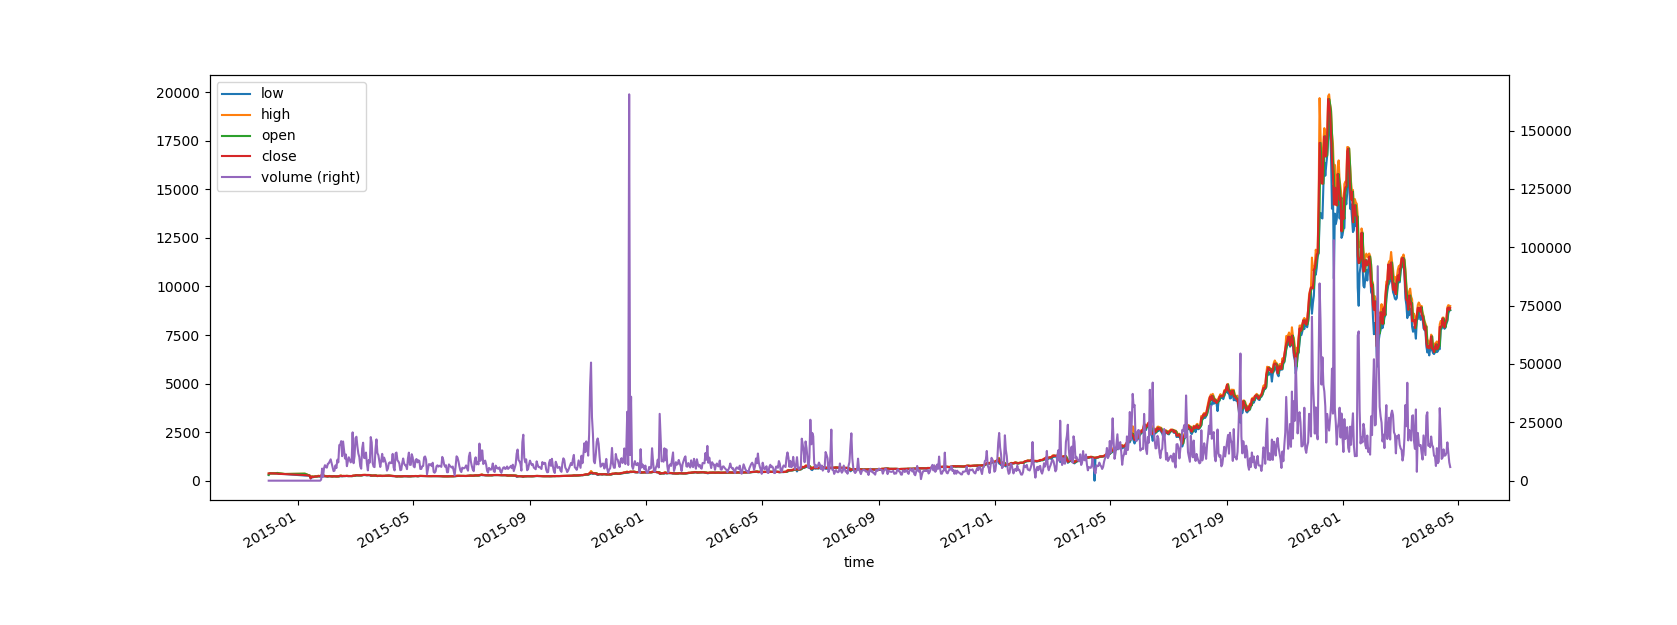

In [145]:
# Plot dataframe using matplotlib
df.set_index('time').plot(secondary_y='volume')

<IPython.core.display.Javascript object>


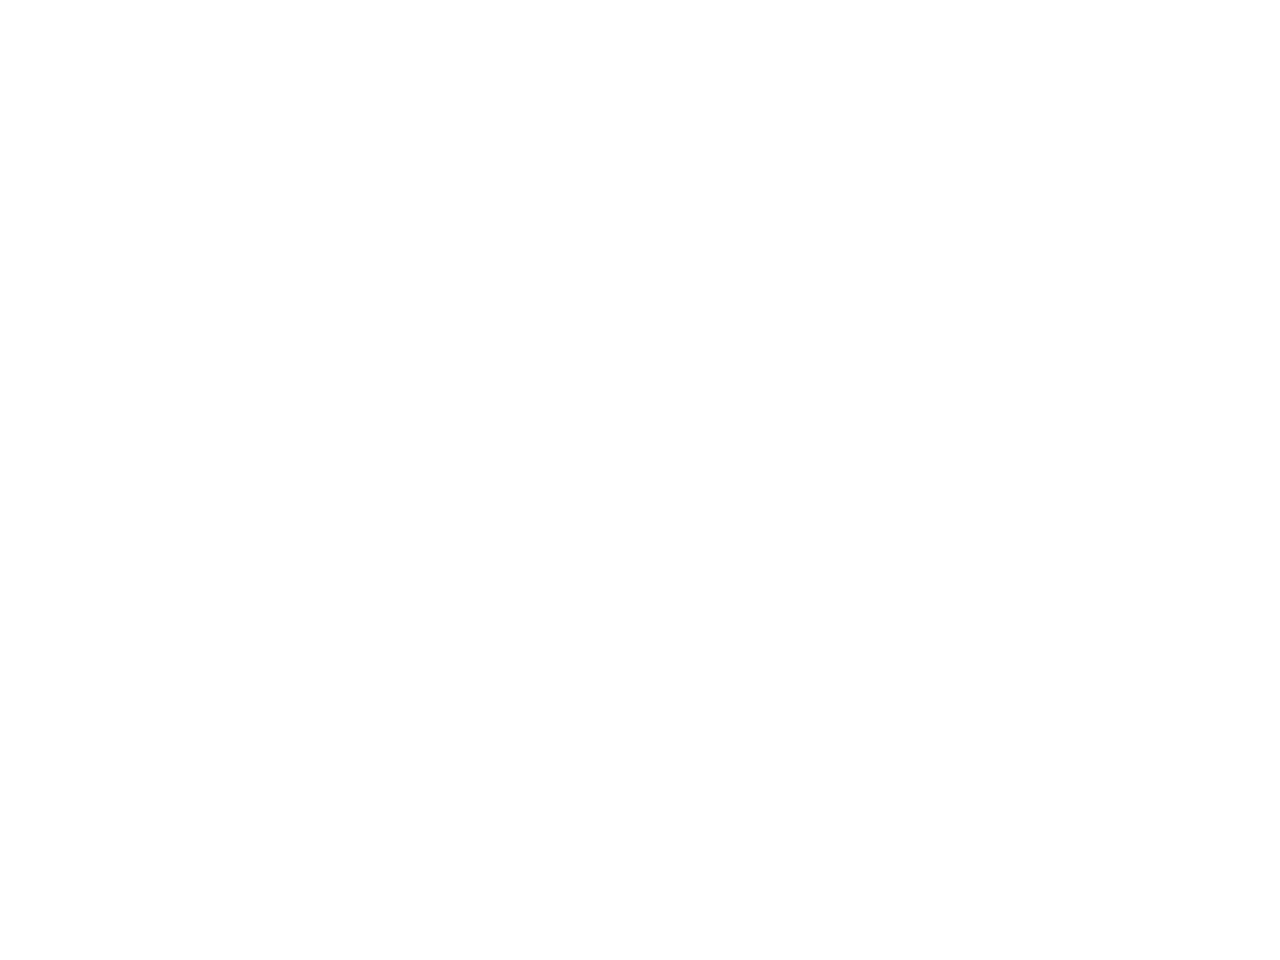

In [88]:
%matplotlib nbagg
df.set_index('time').plot(secondary_y='volume')

In [146]:
# This is just an alternative visualisation so I'm not rewriting this
import plotly.plotly as py
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from datetime import datetime
init_notebook_mode(connected=False)
import cufflinks

data = [go.Candlestick(
    x=df.time,
    open=df.open,
    close=df.close,
    high=df.high,
    low=df.low
)]

In [147]:
py.iplot(data)

## Data Cleaning
LSTM operates best with values in the range -1,1 because of the `tanh` function in the middle

But lets pretend we don't know that and have a look at what other `sklearn` scales give


![](tanh.gif)

In [91]:
# use sklearn.preprocessing fuctions to try out a few scaling methods
# remember iplot and boxplot 

In [92]:
from sklearn.preprocessing import minmax_scale, scale, robust_scale
from functools import partial
key = 'close'
for sn,s in {'MM':partial(minmax_scale, feature_range=(-1,1)), 'SS':scale, 'RS':robust_scale}.items():
    df[f"{key}_{sn}"] = s(df[key].values.reshape(-1, 1))
df[[k for k in df.columns if k.startswith('close')]].head()

close  close_MM  close_SS  close_RS
0  8915.98 -0.099234  1.748741  3.766167
1  8795.01 -0.111623  1.716305  3.711147
2  8915.42 -0.099292  1.748591  3.765912
3  8866.27 -0.104325  1.735412  3.743557
4  8274.00 -0.164977  1.576604  3.474182

In [93]:
 
df.set_index('time')[[c for c in df.columns if c.startswith('close')]].iplot(secondary_y='close')

<IPython.core.display.Javascript object>


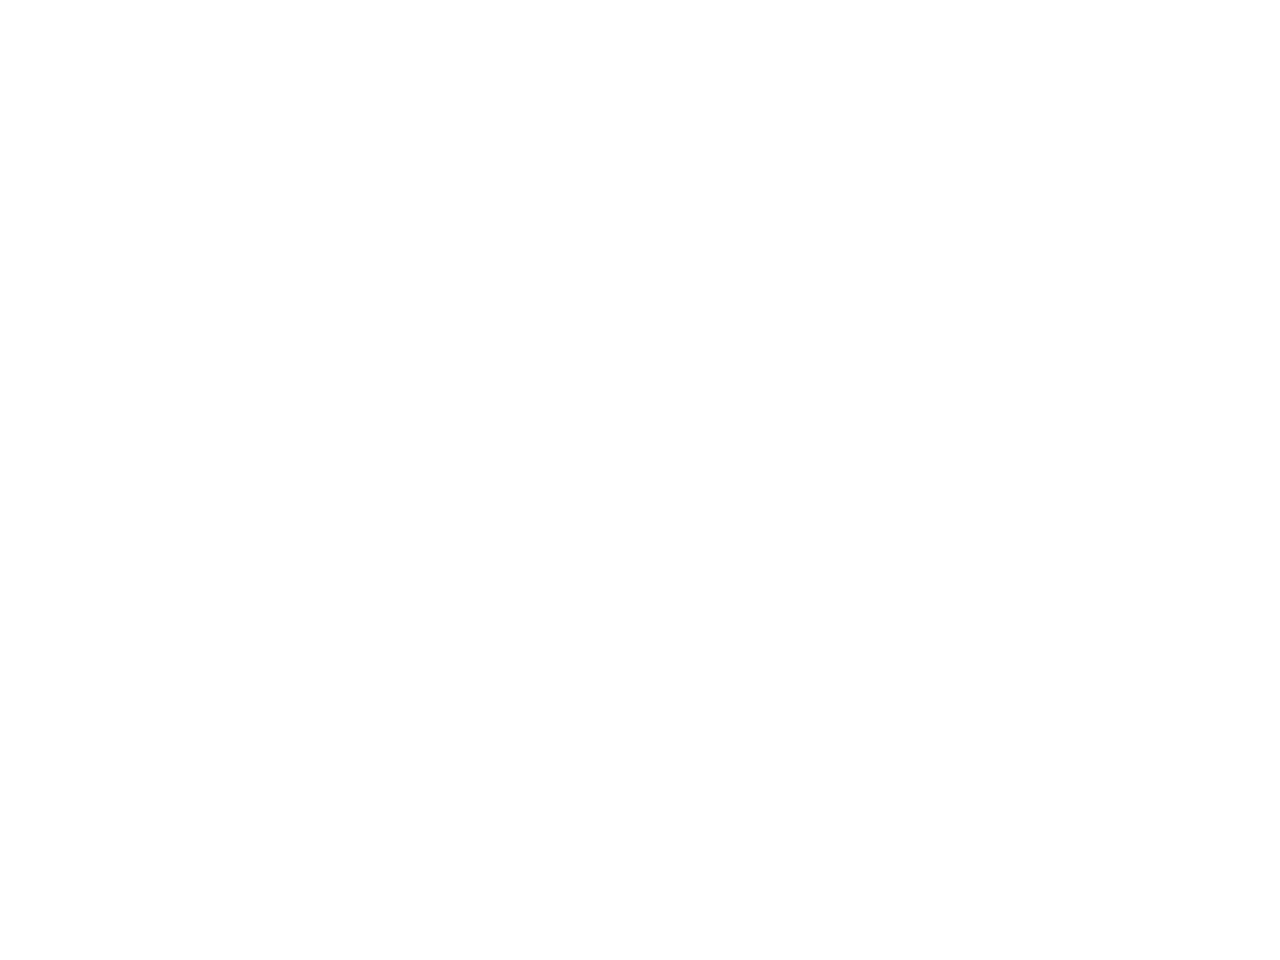

In [94]:
#df.set_index('time')[[c for c in df.columns if c.startswith('close')]].describe()
df.set_index('time')[[c for c in df.columns if c.startswith('close_')]].plot.box()

In [95]:
# create a static mmscaler and show that you can fit/transform the close valuse
# *and* get the original back from the scaled using nverse_transform 

In [96]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(-1,1))
X = df.close.values
print(X.shape)
X = X.reshape(len(X),1)
print(X.shape)
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
inverted_X = scaler.inverse_transform(scaled_X)
np.allclose(X,inverted_X) 

(1206,)
(1206, 1)


True

### Hold your horses hotshot, it's not that simple;
A few other things to bear in mind;
* Predictive modeling means it's 'Supervised' learning but we don't have any labels?
* We want to 'predict' the future value based on the past
* The 'past' of bitcoin as had significant shifts in scale (almost logish)


### Sidebar: What is 'stationarity'?
![](stationary.png)

### The Fixes
* Transform the dataset so we use the 'future' as a label for the 'past'
* Make the data timeseries stationary to correct for relative scaling
* Rescale again


In [149]:
# Need to order the data ascending for supervisfication
X=df.set_index('time').close.sort_index()
X

time
2014-12-01     370.00
2014-12-02     378.00
2014-12-03     378.00
2014-12-04     377.10
2014-12-06     378.00
2014-12-08     375.00
2014-12-10     360.50
2014-12-12     350.00
2014-12-18     340.00
2015-01-08     288.99
2015-01-13     260.00
2015-01-14     120.00
2015-01-15     204.22
2015-01-16     199.46
2015-01-17     184.00
2015-01-19     225.51
2015-01-20     218.00
2015-01-21     225.51
2015-01-22     226.32
2015-01-23     235.00
2015-01-24     240.00
2015-01-25     254.53
2015-01-26     274.48
2015-01-27     263.65
2015-01-28     236.09
2015-01-29     235.03
2015-01-30     229.07
2015-01-31     218.45
2015-02-01     228.99
2015-02-02     237.83
               ...   
2018-03-25    8453.00
2018-03-26    8145.00
2018-03-27    7793.61
2018-03-28    7942.72
2018-03-29    7079.99
2018-03-30    6848.01
2018-03-31    6928.50
2018-04-01    6816.01
2018-04-02    7045.01
2018-04-03    7424.90
2018-04-04    6791.68
2018-04-05    6785.85
2018-04-06    6619.01
2018-04-07    6894.01
2018-

In [98]:
X = df.set_index('time')['close'].sort_index()
X.head()

time
2014-12-01    370.0
2014-12-02    378.0
2014-12-03    378.0
2014-12-04    377.1
2014-12-06    378.0
Name: close, dtype: float64

In [150]:
# Folks, we all know this live coding is a faff, lets get a move on.
def ts_df_to_supervised(df, lag=1):
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    _df = pd.concat(columns, axis=1)
    _df.dropna(inplace=True)
    _df.columns = ['today','tomorrow']
    return _df

sup_df = ts_df_to_supervised(X)
sup_df.head()

today  tomorrow
time                       
2014-12-02  370.0     378.0
2014-12-03  378.0     378.0
2014-12-04  378.0     377.1
2014-12-06  377.1     378.0
2014-12-08  378.0     375.0

In [151]:
## now make the values stationary
def difference(X, lag=1):
    return X.diff(lag).dropna()
difference(sup_df).head()

today  tomorrow
time                       
2014-12-03    8.0       0.0
2014-12-04    0.0      -0.9
2014-12-06   -0.9       0.9
2014-12-08    0.9      -3.0
2014-12-10   -3.0     -14.5

In [152]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

differenced = difference(X)
undifferenced = pd.Series(
    [inverse_difference(X, differenced[i], len(X)-i) 
     for i in range(len(differenced))],
    index = X.index[1:]
) 
(undifferenced-X).sum()

0.0

In [102]:
from sklearn.preprocessing import MinMaxScaler
display(X.head())
_X = X.values.reshape(len(X), 1)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(_X)
scaled_X = scaler.transform(_X)
scaled_series = pd.Series(scaled_X[:, 0], index=X.index)
display(scaled_series.head())
# invert transform to validate
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = pd.Series(inverted_X[:, 0], index=X.index)
display(inverted_series.head())

time
2014-12-01    370.0
2014-12-02    378.0
2014-12-03    378.0
2014-12-04    377.1
2014-12-06    378.0
Name: close, dtype: float64

time
2014-12-01   -0.974398
2014-12-02   -0.973579
2014-12-03   -0.973579
2014-12-04   -0.973671
2014-12-06   -0.973579
dtype: float64

time
2014-12-01    370.0
2014-12-02    378.0
2014-12-03    378.0
2014-12-04    377.1
2014-12-06    378.0
dtype: float64

# *FINALLY*: We can start doing some actual ML
We have:
* Methods to scale/invert data to -1,1
* Methods to transform / invert data to stationary
* Methods to transform data to supervised with configurable 'lag'

## Keras LSTM Cavaets 
* LSTM must be 'stateful' (i.e. doesn't forget between batches) and must be manually cleared
* Expected input to be sample/timestep/feature 3-matrix (we only have one feature atm so that's easy)


In [103]:
def twodim_to_threedim(X):
    return X.values.reshape(X.shape[0],1,X.shape[1])
twodim_to_threedim(difference(ts_df_to_supervised(X)))

array([[[   8.  ,    0.  ]],

       [[   0.  ,   -0.9 ]],

       [[  -0.9 ,    0.9 ]],

       ...,

       [[ 592.27,   49.15]],

       [[  49.15, -120.41]],

       [[-120.41,  120.97]]])

## Splitting Training / Test Datasets
Important to remove bias / overfitting


In [153]:
raw_X = df.set_index('time')['close'].sort_index() # Sort Closes
dX = difference(raw_X)                             # Stationarise
sup_dX = ts_df_to_supervised(dX)               # Supervise
i_split = 2*sup_dX.shape[0]//3
sup_dX_train = sup_dX.iloc[:i_split]      # Training Set
sup_dX_test = sup_dX.iloc[i_split:]       # Test Set
batch_size=2                                   # Use online learning 
n_epoch = 600
n_neurons = 10

In [154]:
 
def scale(train, test):
    # fit scaler to both sets
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train.values)
    # transform train
    train = train.values.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.values.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [155]:
scaler, train_scaled, test_scaled = scale(sup_dX_train, sup_dX_test)

# FIRST BIT OF ACTUAL ML
**Yes Jase, Tensorflow is in the background ☹️**

* And there's no way in fuck I'm doing this bit live
* Single layer 10 stage LSTM with 200 epochs on diffed scaled single-memory input

In [156]:
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
import time
from keras_tqdm import TQDMNotebookCallback
import tqdm

In [157]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, activation='sigmoid', batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    model.fit(X, y, epochs=200, batch_size=batch_size, 
              verbose=0, shuffle=False, 
              callbacks=[TQDMNotebookCallback(leave_inner=False,leave_outer=False)]
             )
    model.reset_states()
    return model

def forecast(model, batch_size, X):
    X = X.reshape( len(X),1, 1,)
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [158]:
lstm = fit_lstm(train_scaled, batch_size, n_epoch, n_neurons)

KeyboardInterrupt: 

In [159]:
## THIS TAKES A LONG TIME SO HERES ONE I MADE (a few) EARLIER
#lstm.save(f'lstm_{batch_size}_{n_epoch}_{n_neurons}.h5')
#lstm = load_model('lstm_batchwise_2.h5')
#lstm.save('lstm_batchwise_2.h5')
lstm = load_model(f'lstm_1_3000_4.h5')
lstm.reset_states()

# Model / Structure Validation
"Walk the line"

* Does the model map test data at all?
* Model has been trained on the first 2/3 of data
* Functionally; model is a 1-1 mapping of diff->next diff, not to value

But first, what's the data actually look like between training and test sets?


<IPython.core.display.Javascript object>


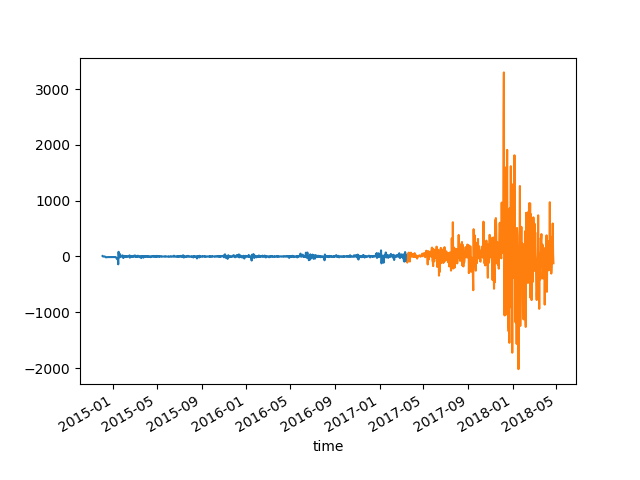

In [160]:
%matplotlib nbagg
sup_dX_train.iloc[0:,0].plot()
sup_dX_test.iloc[0:,0].plot()

In [161]:
# walk-forward validation on the test data
## NOTE: THIS LOOKS AWESOME BUT IS JUST MAKING SURE
## IT WORKS; note the extra knowledge of `raw_x`
## in the diff inversion
predictions = []
yhats = []
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast(lstm, 1, X)
    yhats.append(yhat)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_X, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_X[len(sup_dX_train) + i]
    print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Day=1, Predicted=1145.414933, Expected=1175.110000
Day=2, Predicted=1072.023637, Expected=1069.570000
Day=3, Predicted=1031.286891, Expected=970.000000
Day=4, Predicted=1056.892778, Expected=1019.490000
Day=5, Predicted=1119.638865, Expected=1044.960000
Day=6, Predicted=989.077785, Expected=1114.420000
Day=7, Predicted=1049.893891, Expected=1034.570000
Day=8, Predicted=954.035492, Expected=1025.140000
Day=9, Predicted=980.269689, Expected=934.870000
Day=10, Predicted=991.228337, Expected=963.720000
Day=11, Predicted=1058.290810, Expected=973.080000
Day=12, Predicted=1063.636146, Expected=1042.080000
Day=13, Predicted=1060.670082, Expected=1045.400000
Day=14, Predicted=1059.919691, Expected=1043.270000
Day=15, Predicted=1105.561472, Expected=1042.340000
Day=16, Predicted=1109.670684, Expected=1088.990000
Day=17, Predicted=1130.716002, Expected=1092.000000
Day=18, Predicted=1169.323573, Expected=1113.990000
Day=19, Predicted=1161.514553, Expected=1152.600000
Day=20, Predicted=1150.233271

Day=176, Predicted=4265.616735, Expected=4624.180000
Day=177, Predicted=4364.642342, Expected=4350.000000
Day=178, Predicted=4275.973012, Expected=4334.360000
Day=179, Predicted=4246.466743, Expected=4251.360000
Day=180, Predicted=4197.167053, Expected=4210.720000
Day=181, Predicted=3789.932549, Expected=4164.520000
Day=182, Predicted=3203.840192, Expected=3855.320000
Day=183, Predicted=3745.369716, Expected=3250.400000
Day=184, Predicted=3749.248821, Expected=3740.020000
Day=185, Predicted=3736.599597, Expected=3726.510000
Day=186, Predicted=4049.593571, Expected=3719.970000
Day=187, Predicted=3835.692642, Expected=4100.000000
Day=188, Predicted=3888.713087, Expected=3910.110000
Day=189, Predicted=3520.276753, Expected=3872.060000
Day=190, Predicted=3673.776126, Expected=3617.470000
Day=191, Predicted=3799.126891, Expected=3619.010000
Day=192, Predicted=3571.983451, Expected=3787.330000
Day=193, Predicted=3997.124159, Expected=3669.010000
Day=194, Predicted=3896.886137, Expected=3919.

Day=347, Predicted=10311.780302, Expected=9597.990000
Day=348, Predicted=10543.506886, Expected=10300.000000
Day=349, Predicted=10232.733021, Expected=10566.570000
Day=350, Predicted=10871.681571, Expected=10307.270000
Day=351, Predicted=10999.922046, Expected=10895.920000
Day=352, Predicted=11382.009445, Expected=11000.000000
Day=353, Predicted=11472.734797, Expected=11432.500000
Day=354, Predicted=11383.543619, Expected=11469.900000
Day=355, Predicted=10622.088313, Expected=11377.540000
Day=356, Predicted=9849.706684, Expected=10700.000000
Day=357, Predicted=9237.079436, Expected=9920.000000
Day=358, Predicted=9270.235960, Expected=9304.900000
Day=359, Predicted=8703.579619, Expected=9255.000000
Day=360, Predicted=9524.324304, Expected=8795.440000
Day=361, Predicted=9053.399642, Expected=9533.880000
Day=362, Predicted=9178.474940, Expected=9120.000000
Day=363, Predicted=8149.625942, Expected=9145.410000
Day=364, Predicted=8288.812356, Expected=8207.030000
Day=365, Predicted=8289.4615

<IPython.core.display.Javascript object>


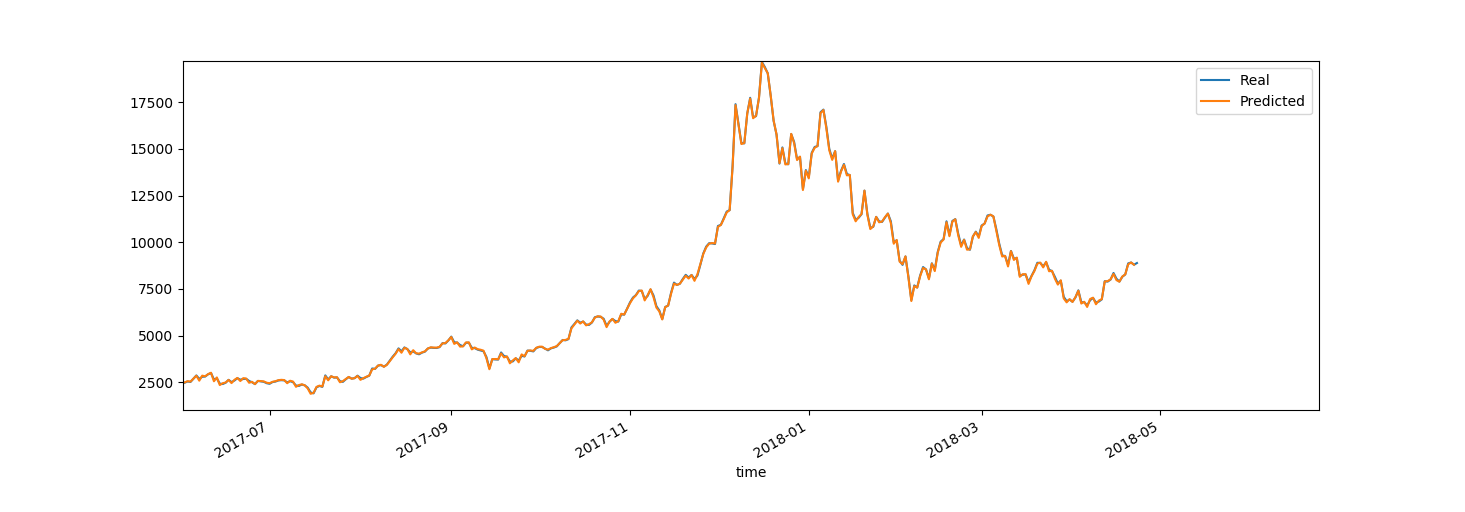

In [162]:
%matplotlib nbagg
import matplotlib.pyplot as plt
f,ax = plt.subplots()
pred = pd.Series(predictions, index=pd.date_range(start=sup_dX_train.index[-1], periods=len(predictions)), name='Prediction')
X = df.set_index('time')['close'].sort_index()
X.plot(label='Real', ax=ax)
pred.plot(label='Predicted', ax=ax)
ax.legend()

In [163]:
# use mse to work out if you're totally fucked
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X[pred.index].values, pred.values)

32.28381575116524

In [164]:
from sklearn.metrics import mean_squared_error
validation = X[pred.index].values,pred.values
mean_squared_error(*validation)

1706.048181115777

In [115]:
# create a new dataframe with the validation values to see how wrong you are
 

<IPython.core.display.Javascript object>


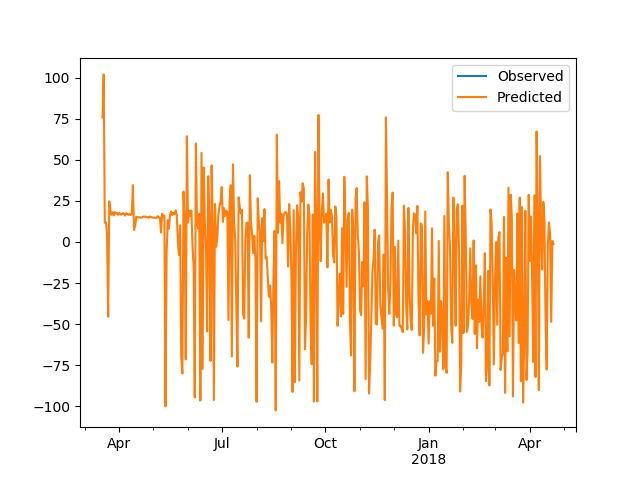

In [165]:
%matplotlib nbagg
_validation = X[pred.index].copy().to_frame('Observed')
_validation['Predicted'] = pred
_validation.diff(axis=1).plot()

In [166]:
# Future predictions are fucked anyway so you're on your own.
X, y = test_scaled[-1, 0:-1], test_scaled[-1, -1]
yhats = []
new_history = raw_X.copy()
for day in tqdm.tqdm_notebook(range(30)):
    yhat = forecast(lstm, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = new_history[-1]+yhat
    X=np.asarray([yhat])
    yhats.append(yhat)
    new_history = np.append(new_history,X)

<IPython.core.display.Javascript object>


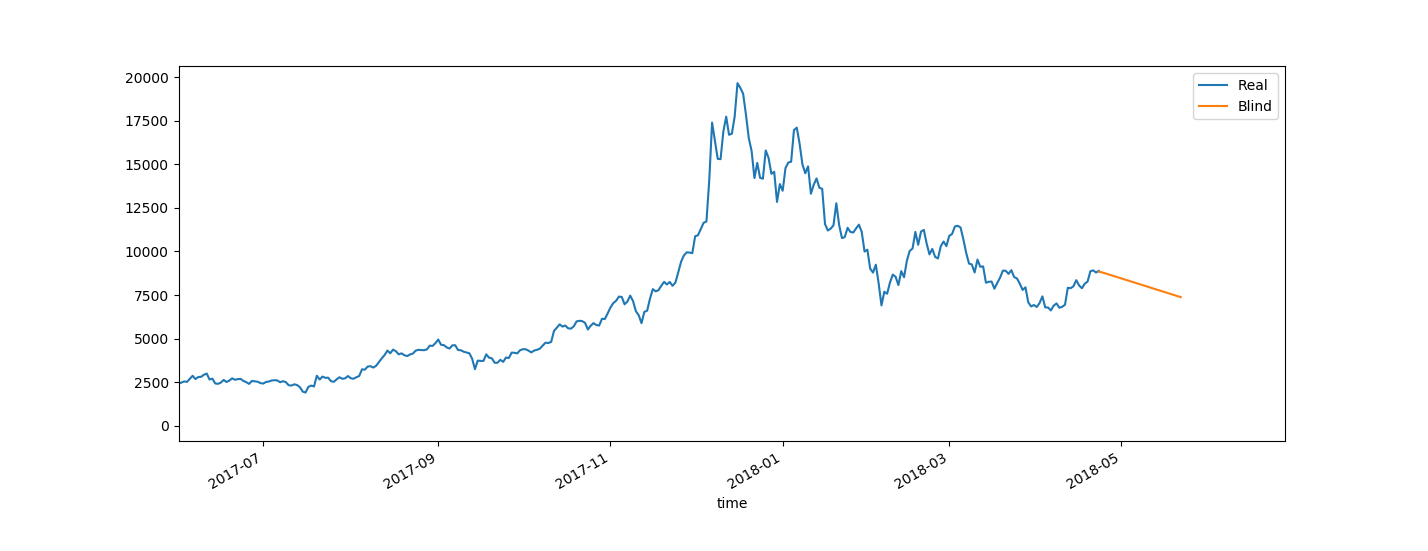

(736481.0, 736873.0)

In [167]:
%matplotlib nbagg
import matplotlib.pyplot as plt
f,ax = plt.subplots()
pred = pd.Series(yhats, index=pd.date_range(start=sup_dX.index[-1], periods=len(yhats)), name='Blind Prediction')
X = df.set_index('time')['close'].sort_index()
X.plot(label='Real', ax=ax)
pred.plot(label='Blind', ax=ax)
ax.legend()
ax.set_xlim([pd.to_datetime('2017-06-01'),pd.to_datetime('2018-06-28')]) 

![](btc.gif)

# What I'd do differently / next?
* Multi-timestep pipeline and hyperparameter optimisation
* i.e. does stationarity correction make a difference?
* Re-training on dynamic timesteps (2/3/4-delay hops)
* Sliding window (needs dive in to TF underbelly)
* Treat multi-currency valuations as correlated features
* Try [Attention Modelling](https://towardsdatascience.com/memory-attention-sequences-37456d271992) instead of LSTM

# Wrap up, Conclusions, Questions?
* This is *crap*.
* Yes, it models the input data fairly well given a split but the predictive model doesn't include the randomness we'd see in the real market
* Could be worthwhile adding in other features (OHLC) and multiple timesteps, but this *explodes* training time.
* It *might* be right about bitcoin going down tomorrow, lemme know if anyone makes any money off it.
* LSTM is *awesome* but it's fiddly. Keras makes life a bit easier but it does constrain a bit.
* I am not an ML expert, I may have made fundamental mistakes
* These models ran a hell of a lot better on a cloud GPU, but there's only so much 'live' I'm willing to risk!

# Addendum: Places I was shamelessly 'insipired by'
* https://www.kaggle.com/microtang/predicting-btc-price-using-rnn/notebook
* https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/
* https://machinelearningmastery.com/use-different-batch-sizes-training-predicting-python-keras/
* http://karpathy.github.io/2015/05/21/rnn-effectiveness/
* https://machinelearningmastery.com/make-predictions-long-short-term-memory-models-keras/
* https://lilianweng.github.io/lil-log/2017/07/08/predict-stock-prices-using-RNN-part-1.html
* http://adventuresinmachinelearning.com/keras-lstm-tutorial/
* https://www.datasciencecentral.com/profiles/blogs/tutorial-forecasting-with-seasonal-arima